# 线性回归模型中使用梯度下降

In [1]:
import numpy as np
import matplotlib.pyplot as plt

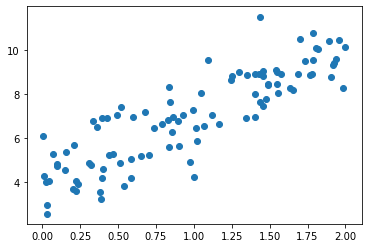

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3.0 + 4.0 + np.random.normal(size=100)
X = x.reshape(-1,1)
plt.scatter(X,y)
plt.show()

## 使用梯度下降法训练

In [3]:
def J(theta,X_b,y):
    return np.sum((X_b.dot(theta)-y)**2) / len(theta)

def dJ(theta, X_b, y):
    res = np.empty(theta.shape)
    for i in range(0, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * (2 / len(X_b))
    
def gradient_descent(X_b,y,initial_theta,eta,n_iters=10000,epsilon=1e-8):
    theta = initial_theta
    for i in range(0,n_iters):
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(theta,X_b,y)-J(last_theta,X_b,y)) < epsilon:
            break
    return theta

In [4]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.1
# print(len(initial_theta),len(X_b))
theta = gradient_descent(X_b, y, initial_theta, eta)
print(theta)

[4.02359914 3.00525673]


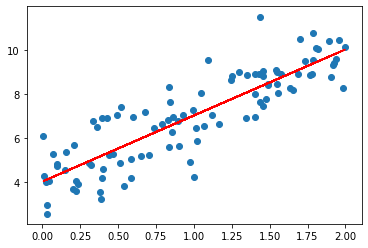

In [5]:
y_predict = X_b.dot(theta)
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.show()

##使用封装的代码

In [6]:
from code.linerRegression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)
print(lin_reg.coef_,lin_reg.intercept_)
  

[3.00525673] 4.023599137669461
